# I. Import pickled dataframe

In [13]:
import pickle, pandas as pd, matplotlib.pyplot as plt
avocados=pd.read_pickle('avoplotto.pkl')


In [8]:
type(avocados)

pandas.core.frame.DataFrame

In [9]:
avocados.head()

,date,type,year,avg_price,size,nb_sold
0,2015-12-27,conventional,2015,0.95,small,9626901.09
1,2015-12-20,conventional,2015,0.98,small,8710021.76
2,2015-12-13,conventional,2015,0.93,small,9855053.66
3,2015-12-06,conventional,2015,0.89,small,9405464.36
4,2015-11-29,conventional,2015,0.99,small,8094803.56


# II. Visualize the data

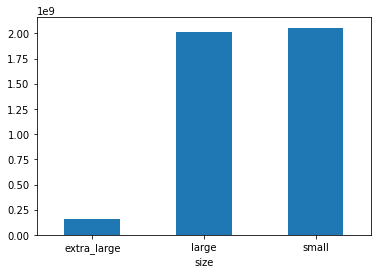

In [14]:
# bar plot 
#Get the total number of avocados sold of each size
nb_sold_by_size = avocados.groupby('size')['nb_sold'].sum()

# Create a bar plot of the number of avocados sold by size
nb_sold_by_size.plot(kind='bar',rot=0)

# Show the plot
plt.show()

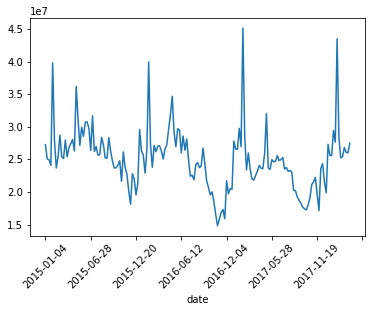

In [15]:
# line plot
# Get the total number of avocados sold on each date
nb_sold_by_date = avocados.groupby('date')['nb_sold'].sum()

# Create a line plot of the number of avocados sold by date
nb_sold_by_date.plot(rot=45)

# Show the plot
plt.show()

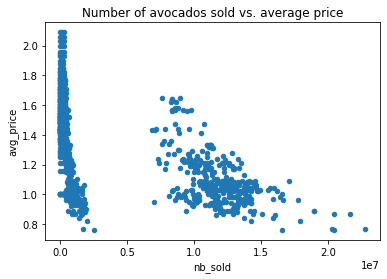

In [16]:
# scatter plot
# nb_sold vs avg_price with title
avocados.plot(kind='scatter',x='nb_sold',y='avg_price',title='Number of avocados sold vs. average price')

# Show the plot
plt.show()

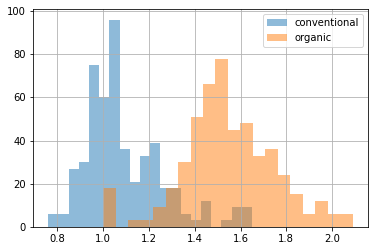

In [17]:
# histogram layering plot
# conventional type avocados average price distribution
avocados[avocados["type"] == "conventional"]["avg_price"].hist(alpha=0.5,bins=20)

# organic type avocados average price distribution
avocados[avocados["type"] == "organic"]["avg_price"].hist(alpha=0.5,bins=20)

# Add a legend
plt.legend(["conventional", "organic"])

# Show the plot
plt.show()

# III. Manupulation of table (pivot, aggregation, etc.)

### III-(a). Pivot table to groupby type and size of avocatos

In [42]:
avocados_dateindexed=avocados.pivot(index='date',columns=['type','size'],values='nb_sold')
avocados_dateindexed.head()

type,conventional,organic,conventional,organic,conventional,organic
size,small,small,large,large,extra_large,extra_large
date,,,,,,
2015-01-04,12357161.34,233286.13,13624083.05,216611.20,844093.32,4370.99
2015-01-11,11544810.53,270966.74,12134773.38,260971.60,866574.66,3830.42
2015-01-18,11858139.34,254319.58,11701947.80,311811.01,831301.90,4020.85
2015-01-25,12167445.03,207494.87,10734652.82,212312.02,768020.05,4753.87
2015-02-01,18933038.04,302561.47,18956479.74,259286.44,1381516.11,5852.28


In [43]:
avocados_dateindexed2=avocados.pivot(index='date',columns=['size','type'],values='nb_sold')
avocados_dateindexed2.head()

size              small                   large             extra_large  \
type       conventional    organic conventional    organic conventional   
date                                                                      
2015-01-04  12357161.34  233286.13  13624083.05  216611.20    844093.32   
2015-01-11  11544810.53  270966.74  12134773.38  260971.60    866574.66   
2015-01-18  11858139.34  254319.58  11701947.80  311811.01    831301.90   
2015-01-25  12167445.03  207494.87  10734652.82  212312.02    768020.05   
2015-02-01  18933038.04  302561.47  18956479.74  259286.44   1381516.11   

size                 
type        organic  
date                 
2015-01-04  4370.99  
2015-01-11  3830.42  
2015-01-18  4020.85  
2015-01-25  4753.87  
2015-02-01  5852.28

### III-(b). Merge sub columns

In [52]:
# addition of conventional avocatos and organic avocatos, grouped only by size: small_total, large_total, xl_total

avocados_dateindexed2['small_total']=avocados_dateindexed2[('small','conventional')]+avocados_dateindexed2[('small','organic')]
avocados_dateindexed2['large_total']=avocados_dateindexed2[('large','conventional')]+avocados_dateindexed2[('large','organic')]
avocados_dateindexed2['xl_total']=avocados_dateindexed2[('extra_large','conventional')]+avocados_dateindexed2[('extra_large','organic')]
avocados_dateindexed2[['small_total','large_total','xl_total']].head()

size,small_total,large_total,xl_total
type,,,
date,,,
2015-01-04,12590447.47,13840694.25,848464.31
2015-01-11,11815777.27,12395744.98,870405.08
2015-01-18,12112458.92,12013758.81,835322.75
2015-01-25,12374939.90,10946964.84,772773.92
2015-02-01,19235599.51,19215766.18,1387368.39


# IV. Missing values inspection

### IV-(a). Check individual values for missing values

      date   type   year  avg_price   size  nb_sold
52   False  False  False      False  False    False
53   False  False  False      False  False    False
54   False  False  False      False  False    False
55   False  False  False      False  False    False
56   False  False  False      False  False    False
..     ...    ...    ...        ...    ...      ...
944  False  False  False      False  False    False
945  False  False  False      False  False    False
946  False  False  False      False  False    False
947  False  False  False      False  False    False
948  False  False  False      False  False    False

[312 rows x 6 columns]
date         False
type         False
year         False
avg_price    False
size         False
nb_sold      False
dtype: bool


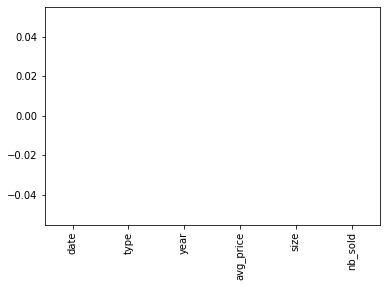

In [20]:
# Note that because the date isn't set as an index, a condition that contains only a year, such as df["date"] == "2009"
# will check if the date is equal to the first day of the first month of the year (e.g. 2009-01-01),
# rather than checking whether the date occurs within the given year. 
# We recommend writing out the full date when using Boolean conditions (e.g., 2009-12-31).
avocados_2016=avocados[(avocados['date']>='2016-01-01')&(avocados['date']<='2016-12-31')]
print(avocados_2016.isna())

# Check each column for missing values
print(avocados_2016.isna().any())

# Bar plot of missing values by variable
avocados_2016.isna().sum().plot(kind='bar')

# Show plot
plt.show()

In [21]:
# Remove rows with missing values
avocados_complete = avocados_2016.dropna()

# Check if any columns contain missing values
print(avocados_complete.isna().any())

date         False
type         False
year         False
avg_price    False
size         False
nb_sold      False
dtype: bool


### IV-(b). replaceing missing value

In [ ]:
avocados.fillna(0)